# Aprendizado Profundo

# Professor: Julio
# Nome: Alekyne Ribeiro e Ana Livia
# Matricula: 541062 e 536158

# **Atividade 1**


1. Exercício de Normalização:
Considere o arquivo wine.dat. Foram feitas várias observações nos lotes de
produção de vinho de uma vinícola. O teor alcólico é a segunda coluna.
Normalie estes dados conforme indicado na fórmula acima.

# Texto sobre a atividade

No arquivo wine.dat, que é um dataset sobre vinho que contem 12 colunas. Foi feito o processo de normalização que foi realizado em três etapas distintas. Primeiro, foi aplicada a normalização por norma constante L2, em que cada variável numérica foi dividida pela sua norma(magnitude), garantindo que os dados ficassem em uma escala comparável. Em seguida, foi realizada a normalização Min-Max, onde os dados foram escalados para um intervalo entre 0 e 1, mantendo as relações entre as variáveis. Por fim, foi aplicado o terceiro método Padronização(média=0, variância=1), transformando os dados para que tivessem média 0 e desvio padrão 1, o que é útil para modelos que assumem distribuições normais. Antes dessa atividade de aplicação denormalização, foi feito a renomeação das colunas para português. Em seguida, foi feita uma análise exploratória básica, verificando valores ausentes, mínimos, máximos, médias e desvio padrão das variáveis e por fim, a coluna ID foi removida. E para visualizar as variáveis, foram gerados um boxplot, um histograma do teor alcoólico e um heatmap da matriz de correlação, facilitando a compreensão das relações entre as variáveis.

# Importação das bibliotecas necessárias

In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregamento da Base de dados

In [29]:
data = pd.read_csv('WineQT.dat')

# Análise descritiva dos dados

In [30]:
colunas_port = [['acidez fixa', 'acidez volatil', 'acido citrico', 'Açucar residual', 'Cloretos', 'Dioxido de enxofre livre', 'dioxido de enxofre total', 'Densidade', 'pH', 'sulfatos', 'alcool', 'qualidade', 'ID']]

data.columns = colunas_port

In [13]:
data.describe()

,acidez fixa,acidez volatil,acido citrico,Açucar residual,Cloretos,Dioxido de enxofre livre,dioxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade,ID
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [14]:
print(data['qualidade'].value_counts())

(qualidade,)
5               483
6               462
7               143
4                33
8                16
3                 6
Name: count, dtype: int64


In [15]:
print('colunas do dataset')
print(data.columns)

print('Valores ausentes no dataset')
print(data.isnull().sum())

print('valor minimo')
print(data.min())
print('valor maximo')
print(data.max())
print('valor médio')
print(data.mean())
print('Desvio padrão')
print(data.std())

colunas do dataset
MultiIndex([(             'acidez fixa',),
            (          'acidez volatil',),
            (           'acido citrico',),
            (         'Açucar residual',),
            (                'Cloretos',),
            ('Dioxido de enxofre livre',),
            ('dioxido de enxofre total',),
            (               'Densidade',),
            (                      'pH',),
            (                'sulfatos',),
            (                  'alcool',),
            (               'qualidade',),
            (                      'ID',)],
           )
Valores ausentes no dataset
acidez fixa                 0
acidez volatil              0
acido citrico               0
Açucar residual             0
Cloretos                    0
Dioxido de enxofre livre    0
dioxido de enxofre total    0
Densidade                   0
pH                          0
sulfatos                    0
alcool                      0
qualidade                   0
ID                  

In [19]:
# metodo 1
# Normalização por norma constante (L2)
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    norma = np.sqrt(np.sum(data[col] ** 2))
    if norma != 0:
        data[col] = data[col] / norma

# Mostrar os dados normalizados
print("Dados normalizados:")
print(data.head())

print("\nVerificação das normas L2 após normalização:")
for col in numeric_cols:
    norma_normalizada = np.sqrt(np.sum(data[col] ** 2))
    print(f'Norma L2 de "{col}" após normalização: {norma_normalizada}')


Dados normalizados:
  acidez fixa acidez volatil acido citrico Açucar residual  Cloretos  \
0    0.025773       0.036917      0.000000        0.019568  0.022720   
1    0.027166       0.046410      0.000000        0.026777  0.029297   
2    0.027166       0.040081      0.003556        0.023687  0.027503   
3    0.039008       0.014767      0.049791        0.019568  0.022421   
4    0.025773       0.036917      0.000000        0.019568  0.022720   

  Dioxido de enxofre livre dioxido de enxofre total Densidade        pH  \
0                 0.017421                 0.017828  0.029610  0.031321   
1                 0.039593                 0.035133  0.029581  0.028555   
2                 0.023756                 0.028316  0.029586  0.029090   
3                 0.026923                 0.031462  0.029616  0.028198   
4                 0.017421                 0.017828  0.029610  0.031321   

   sulfatos    alcool qualidade        ID  
0  0.024380  0.026485  0.025882  0.000000  
1  0.029

In [26]:
# metodo 2
# min-max scaled
max_val, min_val = 1, 0
data_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data = data_std * (max_val - min_val) + min_val
print('dados com min-max:\n\n\n', data)

dados com min-max:


      acidez fixa acidez volatil acido citrico Açucar residual  Cloretos  \
0       0.247788       0.397260          0.00        0.068493  0.106845   
1       0.283186       0.520548          0.00        0.116438  0.143573   
2       0.283186       0.438356          0.04        0.095890  0.133556   
3       0.584071       0.109589          0.56        0.068493  0.105175   
4       0.247788       0.397260          0.00        0.068493  0.106845   
...          ...            ...           ...             ...       ...   
1138    0.150442       0.267123          0.13        0.095890  0.106845   
1139    0.194690       0.342466          0.08        0.068493  0.093489   
1140    0.141593       0.328767          0.08        0.075342  0.130217   
1141    0.115044       0.294521          0.10        0.089041  0.083472   
1142    0.115044       0.359589          0.12        0.075342  0.105175   

     Dioxido de enxofre livre dioxido de enxofre total Densidade        pH  \

In [31]:
# metodo 3
# Padronização da variável (média=0, variância=1)
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    media = np.mean(data[col])
    desvio_padrao = np.std(data[col])
    if desvio_padrao != 0:
        data[col] = (data[col] - media) / desvio_padrao

# Mostrar os dados padronizados
print("Dados padronizados:")
print(data.head())

print("\nVerificação da média e do desvio padrão após padronização:")
for col in numeric_cols:
    media_padronizada = np.mean(data[col])
    desvio_padrao_padronizado = np.std(data[col])
    print(f'Média de "{col}" após padronização: {media_padronizada:.4f}')
    print(f'Desvio padrão de "{col}" após padronização: {desvio_padrao_padronizado:.4f}')

Dados padronizados:
  acidez fixa acidez volatil acido citrico Açucar residual  Cloretos  \
0   -0.521580       0.939332     -1.365027       -0.466421 -0.231395   
1   -0.292593       1.941813     -1.365027        0.050060  0.234247   
2   -0.292593       1.273492     -1.161568       -0.171289  0.107253   
3    1.653789      -1.399789      1.483400       -0.466421 -0.252560   
4   -0.521580       0.939332     -1.365027       -0.466421 -0.231395   

  Dioxido de enxofre livre dioxido de enxofre total Densidade        pH  \
0                -0.450467                -0.363610  0.555854  1.270695   
1                 0.915920                 0.643477  0.036165 -0.708928   
2                -0.060071                 0.246745  0.140103 -0.325775   
3                 0.135127                 0.429852  0.659792 -0.964363   
4                -0.450467                -0.363610  0.555854  1.270695   

   sulfatos    alcool qualidade        ID  
0 -0.573658 -0.963382 -0.815724 -1.735618  
1  0.130

In [21]:
data = data.drop(columns='ID', errors='ignore')

print(data)

     acidez fixa acidez volatil acido citrico Açucar residual  Cloretos  \
0       0.247788       0.397260          0.00        0.068493  0.106845   
1       0.283186       0.520548          0.00        0.116438  0.143573   
2       0.283186       0.438356          0.04        0.095890  0.133556   
3       0.584071       0.109589          0.56        0.068493  0.105175   
4       0.247788       0.397260          0.00        0.068493  0.106845   
...          ...            ...           ...             ...       ...   
1138    0.150442       0.267123          0.13        0.095890  0.106845   
1139    0.194690       0.342466          0.08        0.068493  0.093489   
1140    0.141593       0.328767          0.08        0.075342  0.130217   
1141    0.115044       0.294521          0.10        0.089041  0.083472   
1142    0.115044       0.359589          0.12        0.075342  0.105175   

     Dioxido de enxofre livre dioxido de enxofre total Densidade        pH  \
0                    

<ipython-input-21-3a1dedea2c46>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns='ID', errors='ignore')


In [32]:
from scipy.stats import zscore

# Calculando o Z-Score
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers por variável:\n", outliers)


Outliers por variável:
 acidez fixa                  9
acidez volatil               5
acido citrico                1
Açucar residual             23
Cloretos                    21
Dioxido de enxofre livre    13
dioxido de enxofre total    10
Densidade                   12
pH                           5
sulfatos                    21
alcool                       7
qualidade                    6
ID                           0
dtype: int64


In [33]:
cor_matrix = data.corr().abs()
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
data = data.drop(columns=to_drop)
print(f'Variáveis removidas por colinearidade: {to_drop}')


Variáveis removidas por colinearidade: []


# EDA - Analise Exploratoria dos Dados

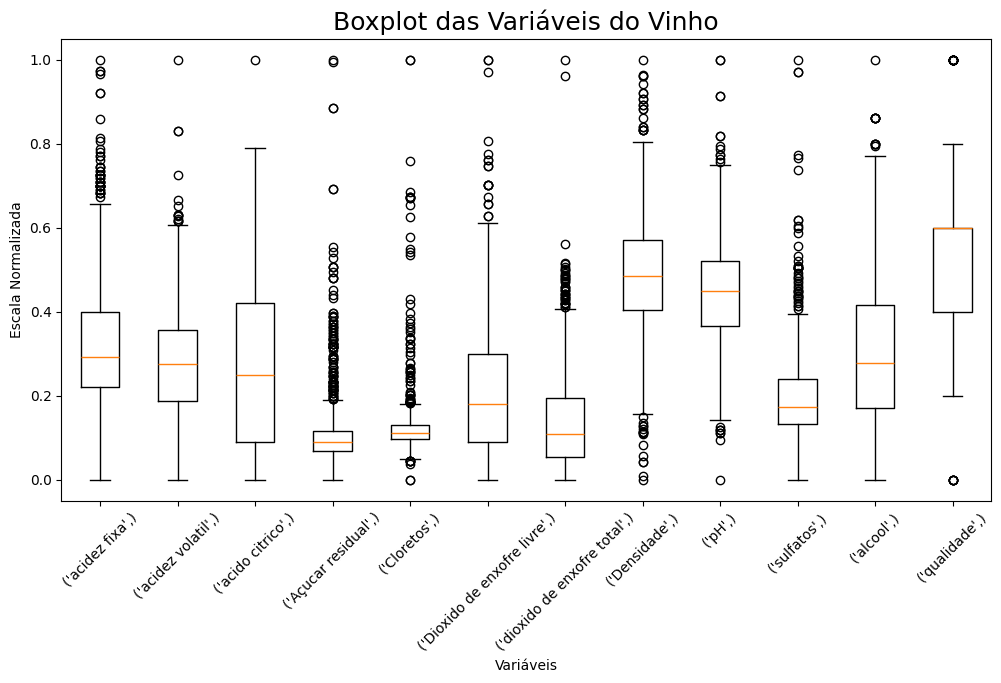

In [ ]:
# Plotar o boxplot com rótulos das colunas no eixo x
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=data.columns)
plt.title("Boxplot das Variáveis do Vinho", loc="center", fontsize=18)
plt.xlabel("Variáveis")
plt.ylabel("Escala Normalizada")
plt.xticks(rotation=45)
plt.show()

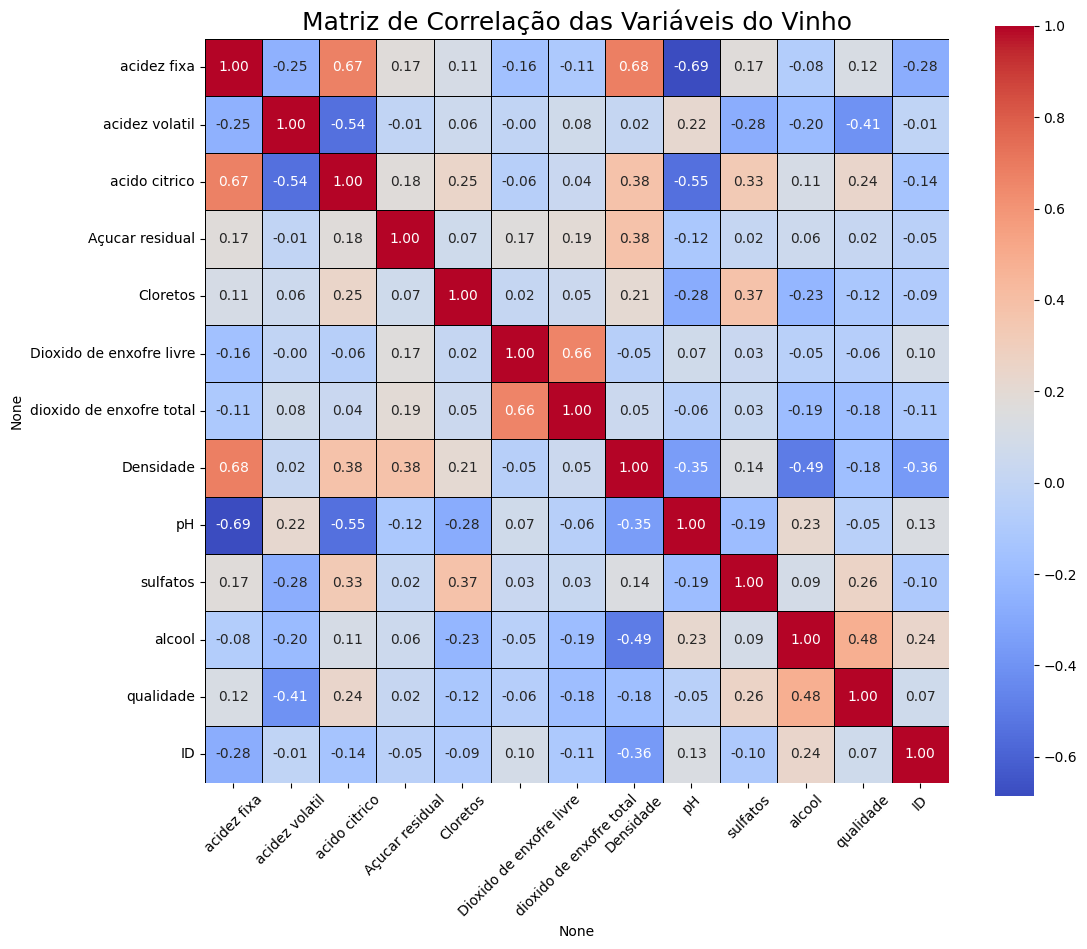

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar=True, linewidths=.5, linecolor='black')

plt.title("Matriz de Correlação das Variáveis do Vinho", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

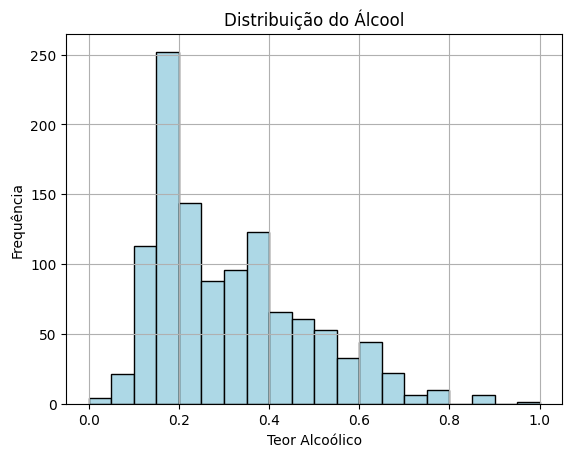

In [ ]:
data['alcool'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribuição do Álcool')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Frequência')
plt.show()